In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('../../db/data/raw/WUP2018-F12-Cities_Over_300K.xlsx', skiprows=16)
df.head()

years = [2011,2012,2013,2014,2015,2016,2017,2018,2019]
for year in years:
    if year not in df:
        df[year] = np.nan
df.head()

,Index,Country Code,Country or area,City Code,Urban Agglomeration,Note,Latitude,Longitude,1950,1955,...,2030,2035,2011,2012,2013,2014,2016,2017,2018,2019
0,1,4,Afghanistan,20001,Herat,NaN,34.348170,62.19967,82.468,85.751,...,897.041,1057.573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4,Afghanistan,20002,Kabul,NaN,34.528887,69.17246,170.784,220.749,...,5737.138,6760.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4,Afghanistan,20003,Kandahar,NaN,31.613320,65.71013,82.199,89.785,...,679.278,800.461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,Afghanistan,20004,Mazar-e Sharif,NaN,36.709040,67.11087,30.000,37.139,...,816.040,962.262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,8,Albania,20005,Tiranë (Tirana),NaN,41.327500,19.81889,84.513,106.932,...,565.301,581.626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_fixed = pd.melt(df, id_vars=['Country Code','Country or area', 'City Code', 'Urban Agglomeration', 'Latitude', 'Longitude'], value_vars=[1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
df_fixed = df_fixed.sort_values(by=['Country Code', 'Urban Agglomeration']).reset_index().drop(columns=['index']).rename(columns={"Country Code":"Country_Code", "Country or area": "Country", "City Code":"City_Code", "Urban Agglomeration": "City", "variable": "Year", "value": "Population_in_Thousands"})
df_fixed["Interpolated"] = False
for index, row in df_fixed.iterrows():
    if pd.isna(row["Population_in_Thousands"]):
        df_fixed.iloc[index, -1] = True
    else:
        df_fixed.iloc[index, -1] = False
df_fixed.head()

,Country_Code,Country,City_Code,City,Latitude,Longitude,Year,Population_in_Thousands,Interpolated
0,4,Afghanistan,20001,Herat,34.34817,62.19967,1950,82.468,False
1,4,Afghanistan,20001,Herat,34.34817,62.19967,1955,85.751,False
2,4,Afghanistan,20001,Herat,34.34817,62.19967,1960,89.166,False
3,4,Afghanistan,20001,Herat,34.34817,62.19967,1965,92.715,False
4,4,Afghanistan,20001,Herat,34.34817,62.19967,1970,101.576,False


In [4]:
interpdata_full = df_fixed["Population_in_Thousands"].interpolate(method='linear')
df_interp = df_fixed
df_interp["Population_in_Thousands"] = interpdata_full
df_interp.head()

,Country_Code,Country,City_Code,City,Latitude,Longitude,Year,Population_in_Thousands,Interpolated
0,4,Afghanistan,20001,Herat,34.34817,62.19967,1950,82.468,False
1,4,Afghanistan,20001,Herat,34.34817,62.19967,1955,85.751,False
2,4,Afghanistan,20001,Herat,34.34817,62.19967,1960,89.166,False
3,4,Afghanistan,20001,Herat,34.34817,62.19967,1965,92.715,False
4,4,Afghanistan,20001,Herat,34.34817,62.19967,1970,101.576,False


In [5]:
df_interp.to_csv("../../db/data/un_city_population_full.csv", index=False)

In [6]:
gdci_country_scope_df = pd.read_csv('../../db/data/GDCI_city_country.csv')
joined_df = df_interp.merge(right=gdci_country_scope_df, how="inner", on=["City", "Country"])
joined_df.head()

,Country_Code,Country,City_Code,City,Latitude,Longitude,Year,Population_in_Thousands,Interpolated
0,36,Australia,206167,Sydney,-33.86785,151.20732,1950,1689.935,False
1,36,Australia,206167,Sydney,-33.86785,151.20732,1955,1905.976,False
2,36,Australia,206167,Sydney,-33.86785,151.20732,1960,2134.673,False
3,36,Australia,206167,Sydney,-33.86785,151.20732,1965,2390.224,False
4,36,Australia,206167,Sydney,-33.86785,151.20732,1970,2892.477,False


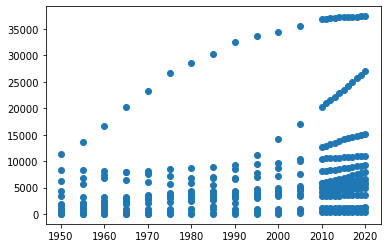

In [7]:
# Looking at 2010 - 2020, seeing what kind of trend the data has (linear, polynomial, etc.)
plt.scatter(x=joined_df["Year"], y=joined_df["Population_in_Thousands"]);

In [8]:
joined_df.to_csv("../../db/data/un_city_population_in_scope.csv", index=False)